In [1]:
import plotly.graph_objects as go
import os
import pickle
import random
import math
import numpy as np

In [2]:
def get_weighted_mean_dict_weight_dict(weight_description,last_few):
    '''
    works on the dictionary of weights
    to create a dict of mean of weights     
    for the last few epochs
    and gives a weightage to each weight value
    depending on the epoch
    last epoch highest weight
    '''
    weighted_mean_weight_description={}

    for layer in weight_description.keys():  
        if layer not in weighted_mean_weight_description:
            weighted_mean_weight_description[layer]={}
        for index_component in weight_description[layer].keys():
            if index_component not in weighted_mean_weight_description[layer]:
                weighted_mean_weight_description[layer][index_component]={}
            for index_wt in weight_description[layer][index_component].keys():
                if index_wt not in weighted_mean_weight_description[layer][index_component]:
                    weighted_mean_weight_description[layer][index_component][index_wt]=[]
                all_wts=weight_description[layer][index_component][index_wt][-last_few:]
                i_weights=[math.sqrt(i) for i in range(1,last_few+1)]
#                 print(all_wts,i_weights)
                all_wts_mean=np.average(all_wts,weights=i_weights)                
                weighted_mean_weight_description[layer][index_component][index_wt]=all_wts_mean                    
        
    return weighted_mean_weight_description    


In [3]:
weight_description= pickle.load( open( "pickles/weight_description_CNN_05_1_100.p", "rb" ) )



In [4]:
'''
weight_description:
    layer_name:
        component_number:
            weight_number:
                [values at each epoch]


'''

'\nweight_description:\n    layer_name:\n        component_number:\n            weight_number:\n                [values at each epoch]\n\n\n'

In [14]:
componenet_num=0
wt_num=1
print("Number of epochs = ",len(weight_description["conv1.weight"][componenet_num][wt_num]))
weight_description.keys()
weight_description["conv1.weight"][0][0]



tuples_combo=[]
fig = go.Figure()
# take some random components
layer_names=list(weight_description.keys())


layer_num=0
for nm in layer_names:
    component_numbers=list(weight_description[nm].keys())
    for component_number in component_numbers[:10]:
        for weight_number in list(weight_description[nm][component_number].keys())[:10]:
#             print(component_number,weight_number)
            wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
            epochs=len(wt_distribution)
            xs=[i for i in range(0,epochs)]
            
            dx = xs[1]-xs[0]

            

#             if wt_distribution[0]>0.9:

    
#             fig.add_trace(go.Scatter(x=xs, y=wt_distribution,
#                 mode='lines+markers',
#                 name=str(weight_number)))
        
            fig.add_trace(go.Scatter(x=xs, y=wt_distribution,
                mode='lines+markers',
                name=str(layer_num)+"_"+str(component_number)+"_"+str(weight_number)))
        break
    layer_num+=1
        

        
    

fig.update_layout(
    title="Progression of weight values across epochs",
    xaxis_title="Epochs",
    yaxis_title="Weight Value",
#     legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
#     )
)
            
fig.show()

fig.write_image("images/wt_values_progression.svg")
fig.write_image("images/wt_values_progression.pdf")



Number of epochs =  101


### Same graph using matplotlib

Number of epochs =  101


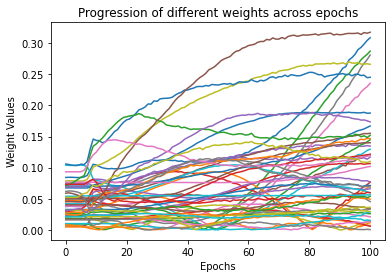

In [26]:
# nah use matplotlib
import matplotlib.pyplot as plt
componenet_num=0
wt_num=1
print("Number of epochs = ",len(weight_description["conv1.weight"][componenet_num][wt_num]))
weight_description.keys()
weight_description["conv1.weight"][0][0]



tuples_combo=[]
fig = go.Figure()
# take some random components
layer_names=list(weight_description.keys())


for nm in layer_names:
    component_numbers=list(weight_description[nm].keys())
    for component_number in component_numbers[:10]:
        for weight_number in list(weight_description[nm][component_number].keys())[:10]:
#             print(component_number,weight_number)
            wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
            epochs=len(wt_distribution)
            xs=[i for i in range(0,epochs)]
            
            dx = xs[1]-xs[0]

            

#             if wt_distribution[0]>0.9:

    
#             fig.add_trace(go.Scatter(x=xs, y=wt_distribution,
#                 mode='lines+markers',
#                 name=str(weight_number)))
            plt.plot(xs, wt_distribution)
#             fig.add_trace(go.Scatter(x=xs, y=wt_distribution,
#                 mode='lines+markers',
#                 name=str(weight_number)))
        break

        
plt.xlabel("Epochs")
plt.ylabel("Weight Values")
plt.title("Progression of different weights across epochs")
plt.savefig("images/wt_values_progression.svg")            
plt.savefig("images/wt_values_progression.pdf")            
plt.show()



Number of epochs =  101
0 2
0 7


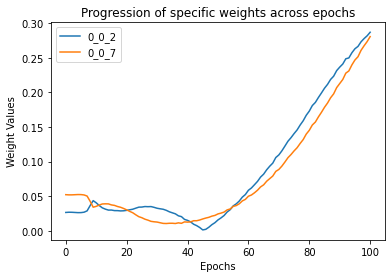

In [22]:
componenet_num=0
wt_num=1
print("Number of epochs = ",len(weight_description["conv1.weight"][componenet_num][wt_num]))
weight_description.keys()
weight_description["conv1.weight"][0][0]



tuples_combo=[]

# take some random components
layer_names=list(weight_description.keys())

layer_num=0
for nm in layer_names[:1]:
    component_numbers=list(weight_description[nm].keys())
    for component_number in [0]:
        for weight_number in [2,7]:
            print(component_number,weight_number)
            wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
            epochs=len(wt_distribution)
            xs=[i for i in range(0,epochs)]
            
            dx = xs[1]-xs[0]

            

#             if wt_distribution[0]>0.9:

    
#             fig.add_trace(go.Scatter(x=xs, y=wt_distribution,
#                 mode='lines+markers',
#                 name=str(weight_number)))
        
            plt.plot(xs, wt_distribution,label=str(layer_num)+"_"+str(component_number)+"_"+str(weight_number))
            
    
    layer_num+=1
        
    

plt.xlabel("Epochs")
plt.ylabel("Weight Values")
plt.legend()
plt.title("Progression of specific weights across epochs")
plt.savefig("images/fall_rise_wt_values_progression.svg")            
plt.savefig("images/fall_rise_wt_values_progression.pdf")            
plt.show()



Number of epochs =  101


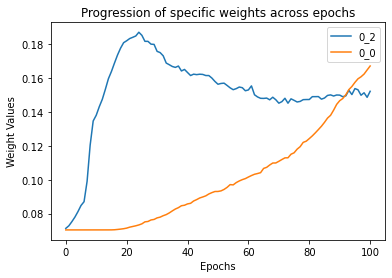

In [25]:
# similar end value but different rises totally
componenet_num=0
wt_num=1
print("Number of epochs = ",len(weight_description["conv1.weight"][componenet_num][wt_num]))
weight_description.keys()
weight_description["conv1.weight"][0][0]

layer_names=list(weight_description.keys())

# case 1
# layer#4
# neuron#0
# weight#2

nm=layer_names[4]
component_number=0
weight_number=2
wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
plt.plot(xs, wt_distribution,label=str(component_number)+"_"+str(weight_number))

# case 2
# layer#3
# neuron#0
# weight#0
nm=layer_names[3]
component_number=0
weight_number=0
wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
plt.plot(xs, wt_distribution,label=str(component_number)+"_"+str(weight_number))
# layer number not kept on purpose
        
    

plt.xlabel("Epochs")
plt.ylabel("Weight Values")
plt.legend()
plt.title("Progression of specific weights across epochs")
plt.savefig("images/same_end_diff_rise.svg")            
plt.savefig("images/same_end_diff_rise.pdf")            
plt.show()



Number of epochs =  101


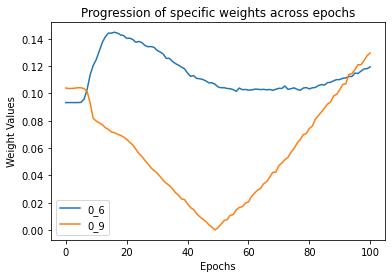

In [27]:
# similar start value but different pattern
componenet_num=0
wt_num=1
print("Number of epochs = ",len(weight_description["conv1.weight"][componenet_num][wt_num]))
weight_description.keys()
weight_description["conv1.weight"][0][0]

layer_names=list(weight_description.keys())

# case 1
# layer#4
# neuron#0
# weight#6

nm=layer_names[4]
component_number=0
weight_number=6
wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
plt.plot(xs, wt_distribution,label=str(component_number)+"_"+str(weight_number))

# case 2
# layer#0
# neuron#0
# weight#9
nm=layer_names[0]
component_number=0
weight_number=9
wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
plt.plot(xs, wt_distribution,label=str(component_number)+"_"+str(weight_number))
# layer number not kept on purpose
        
    

plt.xlabel("Epochs")
plt.ylabel("Weight Values")
plt.legend()
plt.title("Progression of specific weights across epochs")
plt.savefig("images/same_start_diff_pattern.svg")            
plt.savefig("images/same_start_diff_pattern.pdf")            
plt.show()



In [12]:
componenet_num=0
wt_num=1
print("Number of epochs = ",len(weight_description["conv1.weight"][componenet_num][wt_num]))
weight_description.keys()
weight_description["conv1.weight"][0][0]



tuples_combo=[]
fig = go.Figure()
# take some random components
layer_names=list(weight_description.keys())


for nm in layer_names:
    component_numbers=list(weight_description[nm].keys())
    for component_number in component_numbers[:10]:
        for weight_number in list(weight_description[nm][component_number].keys())[:10]:
#             print(component_number,weight_number)
            wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
            epochs=len(wt_distribution)
            xs=[i for i in range(0,epochs)]
            
            dx = xs[1]-xs[0]
            y = wt_distribution
            vel = np.gradient(y, dx)
            accel=np.gradient(vel, dx)


#             if wt_distribution[0]>0.9:

    
#             fig.add_trace(go.Scatter(x=xs, y=wt_distribution,
#                 mode='lines+markers',
#                 name=str(weight_number)))
        
            fig.add_trace(go.Scatter(x=xs, y=vel,
                mode='lines+markers',
                name=str(weight_number)))
        break

        
    

fig.update_layout(
    title="Velocity of weights across epochs",
    xaxis_title="Epochs",
    yaxis_title="Weight Value",
    legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
#     )
)
            
fig.show()





Number of epochs =  101


In [ ]:
componenet_num=0
wt_num=1
print("Number of epochs = ",len(weight_description["conv1.weight"][componenet_num][wt_num]))
weight_description.keys()
weight_description["conv1.weight"][0][0]



tuples_combo=[]
fig = go.Figure()
# take some random components
layer_names=list(weight_description.keys())


for nm in layer_names:
    component_numbers=list(weight_description[nm].keys())
    for component_number in component_numbers:
        for weight_number in weight_description[nm][component_number].keys():
#             print(component_number,weight_number)
            wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
            epochs=len(wt_distribution)
            xs=[i for i in range(0,epochs)]
            
            dx = xs[1]-xs[0]
            y = wt_distribution
            vel = np.gradient(y, dx)
            accel=np.gradient(vel, dx)


#             if wt_distribution[0]>0.9:

    
#             fig.add_trace(go.Scatter(x=xs, y=wt_distribution,
#                 mode='lines+markers',
#                 name=str(weight_number)))
        
            fig.add_trace(go.Scatter(x=xs, y=vel,
                mode='lines+markers',
                name=str(weight_number)))
        break

        
    

fig.update_layout(
    title="Velocity of weights across epochs",
    xaxis_title="Epochs",
    yaxis_title="Weight Value",
    legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
#     )
)
            
fig.show()



# last_few=50
# mean_weight_description_weighted=get_weighted_mean_dict_weight_dict(weight_description,last_few)



# weight_names=[]
# weight_mean_vals=[]

# for nm in layer_names:
#     for component_number in random_component_numbers:
#         for weight_number in weight_description[nm][component_number].keys():
#             mean_wt=abs(mean_weight_description_weighted[nm][component_number][weight_number])
#             weight_names.append(str(weight_number))
#             weight_mean_vals.append(mean_wt)


# indices=np.argsort(np.array(weight_mean_vals))

# weight_mean_vals_sorted=[]
# weight_names_sorted=[]

# for index in indices:
    
#     weight_mean_vals_sorted.append(weight_mean_vals[index])
#     weight_names_sorted.append(weight_names[index])     
    
    
# import plotly.graph_objects as go
# xs=weight_names_sorted
# ys=weight_mean_vals_sorted

# fig = go.Figure([go.Bar(x=xs, y=ys)])
# fig.update_layout(
#     title="Weighted mean of weights across last 50 epochs for layer 1, neuron "+str(component_number),
#     xaxis_title="Weight Number",
#     yaxis_title="Weighted Mean",
#     legend_title="Legend Title",
# #     font=dict(
# #         family="Courier New, monospace",
# #         size=18,
# #         color="RebeccaPurple"
# #     )
# )


# fig.show()
    

In [ ]:

'''
mean_weight_description_weighted:
    layer:
        component_number:
            weight_number: weighted mean

'''

In [ ]:
print(weight_mean_vals)


In [ ]:
weight_description= pickle.load( open( "pickles/weight_description_CNN.p", "rb" ) )



In [ ]:
componenet_num=0
wt_num=1
print("Number of epochs = ",len(weight_description["conv1.weight"][componenet_num][wt_num]))
weight_description.keys()
weight_description["conv1.weight"][0][0]



tuples_combo=[]
fig = go.Figure()
# take some random components
layer_names=list(weight_description.keys())


for nm in layer_names[:1]:
    component_numbers=list(weight_description[nm].keys())
    for component_number in component_numbers[:1]:
        for weight_number in weight_description[nm][component_number].keys():
            wt_distribution=np.abs(np.array(weight_description[nm][component_number][weight_number]))
            epochs=len(wt_distribution)
            xs=[i for i in range(0,epochs)]
            fig.add_trace(go.Scatter(x=xs, y=wt_distribution,
                mode='lines+markers',
                name=str(weight_number)))


        
    

fig.update_layout(
    title="Evolution of high magnitude weights across epochs",
    xaxis_title="Epochs",
    yaxis_title="Weight Value",
    legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
#     )
)
            
fig.show()



last_few=50
mean_weight_description_weighted=get_weighted_mean_dict_weight_dict(weight_description,last_few)



weight_names=[]
weight_mean_vals=[]

for nm in layer_names[:1]:
    component_numbers=list(weight_description[nm].keys())
    for component_number in component_numbers[:1]:
        for weight_number in weight_description[nm][component_number].keys():
            mean_wt=abs(mean_weight_description_weighted[nm][component_number][weight_number])
            weight_names.append(str(weight_number))
            weight_mean_vals.append(mean_wt)


indices=np.argsort(np.array(weight_mean_vals))

weight_mean_vals_sorted=[]
weight_names_sorted=[]

for index in indices:
    
    weight_mean_vals_sorted.append(weight_mean_vals[index])
    weight_names_sorted.append(weight_names[index])     
    
    
import plotly.graph_objects as go
xs=weight_names_sorted
ys=weight_mean_vals_sorted

fig = go.Figure([go.Bar(x=xs, y=ys)])
fig.update_layout(
    title="Weighted mean of weights across last 50 epochs for layer 1, neuron "+str(component_number),
    xaxis_title="Weight Number",
    yaxis_title="Weighted Mean",
    legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
#     )
)


fig.show()
    

In [ ]:
weight_mean_vals_sorted

In [ ]:
weight_names_sorted

In [ ]:
import torch

In [ ]:
w = torch.empty(3, 5)
torch.nn.init.uniform_(w,a=0.9,b=1)